In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

In [17]:
# Load NetCDF file
nc_file_path = '8b5f1222ef03cc9bf468a0dee16ddcd4_ferret_listing.nc'  # Replace with the path to your NetCDF file
nc_dataset = Dataset(nc_file_path, 'r')

In [18]:
nc_dataset.variables.keys()

dict_keys(['lon', 'lat', 'time', 'sea_ice_mask'])

In [36]:
# Assuming you have latitude and longitude variables in your NetCDF file

lat = nc_dataset.variables['lat'][:].data
lon = nc_dataset.variables['lon'][:].data
time = nc_dataset.variables['time'][:].data
data = nc_dataset.variables['sea_ice_mask'][:].data.squeeze()

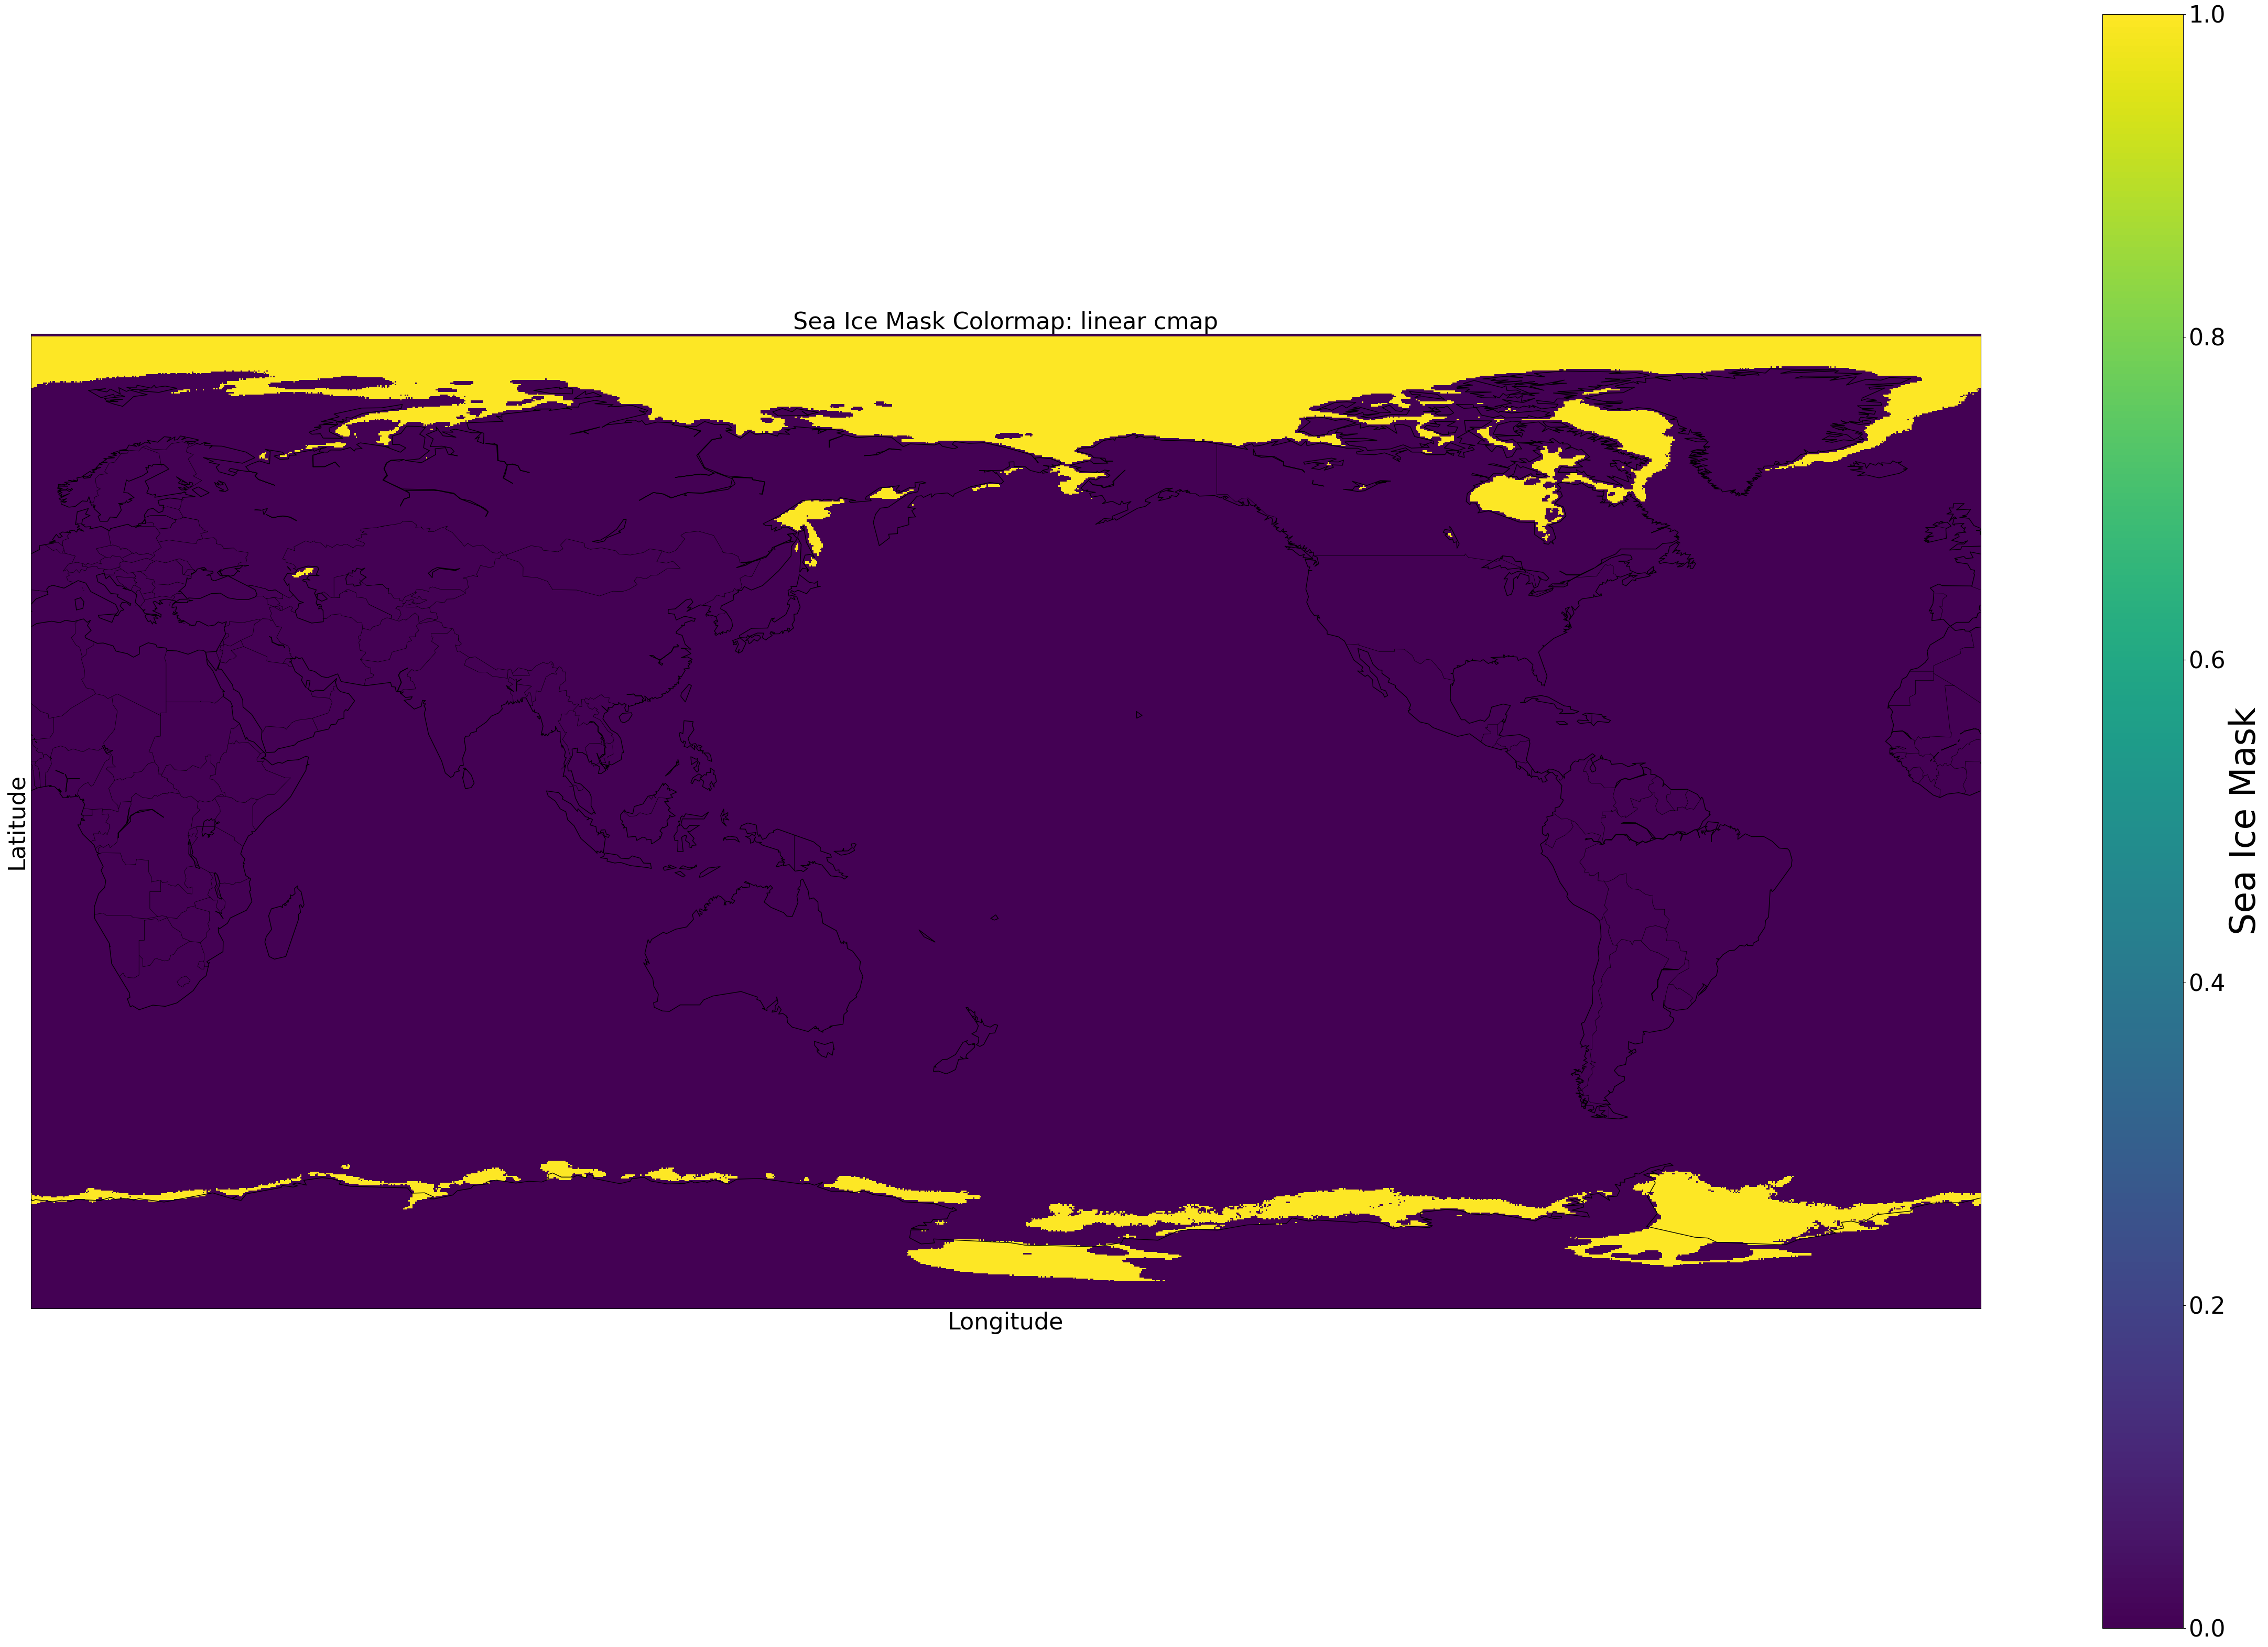

In [48]:
vmin = -5
vmax = 10
# Create a b instance for the world map
m = Basemap(projection='cyl', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)

# Create a figure and axis
fig = plt.figure(figsize=(12*5, 8*5))
ax = fig.add_subplot(1, 1, 1)

# Draw the coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Convert longitude and latitude to map coordinates
x, y = np.meshgrid(lon, lat)
x, y = m(x, y)

# Create the color plot (heatmap)
cax = ax.pcolormesh(x, y, data, cmap='viridis', shading='auto', vmin=0, vmax=1)

# Add a colorbar
cbar = fig.colorbar(cax)
cbar.ax.tick_params(labelsize=32)
cbar.set_label('Sea Ice Mask', fontsize=48)

# Add labels and title,
ax.set_xlabel('Longitude', fontsize=32)
ax.set_ylabel('Latitude', fontsize=32)
ax.set_title('Sea Ice Mask Colormap: linear cmap', fontsize=32)

# Show the plot
plt.show()

In [49]:
from matplotlib.colors import LogNorm, BoundaryNorm, ListedColormap

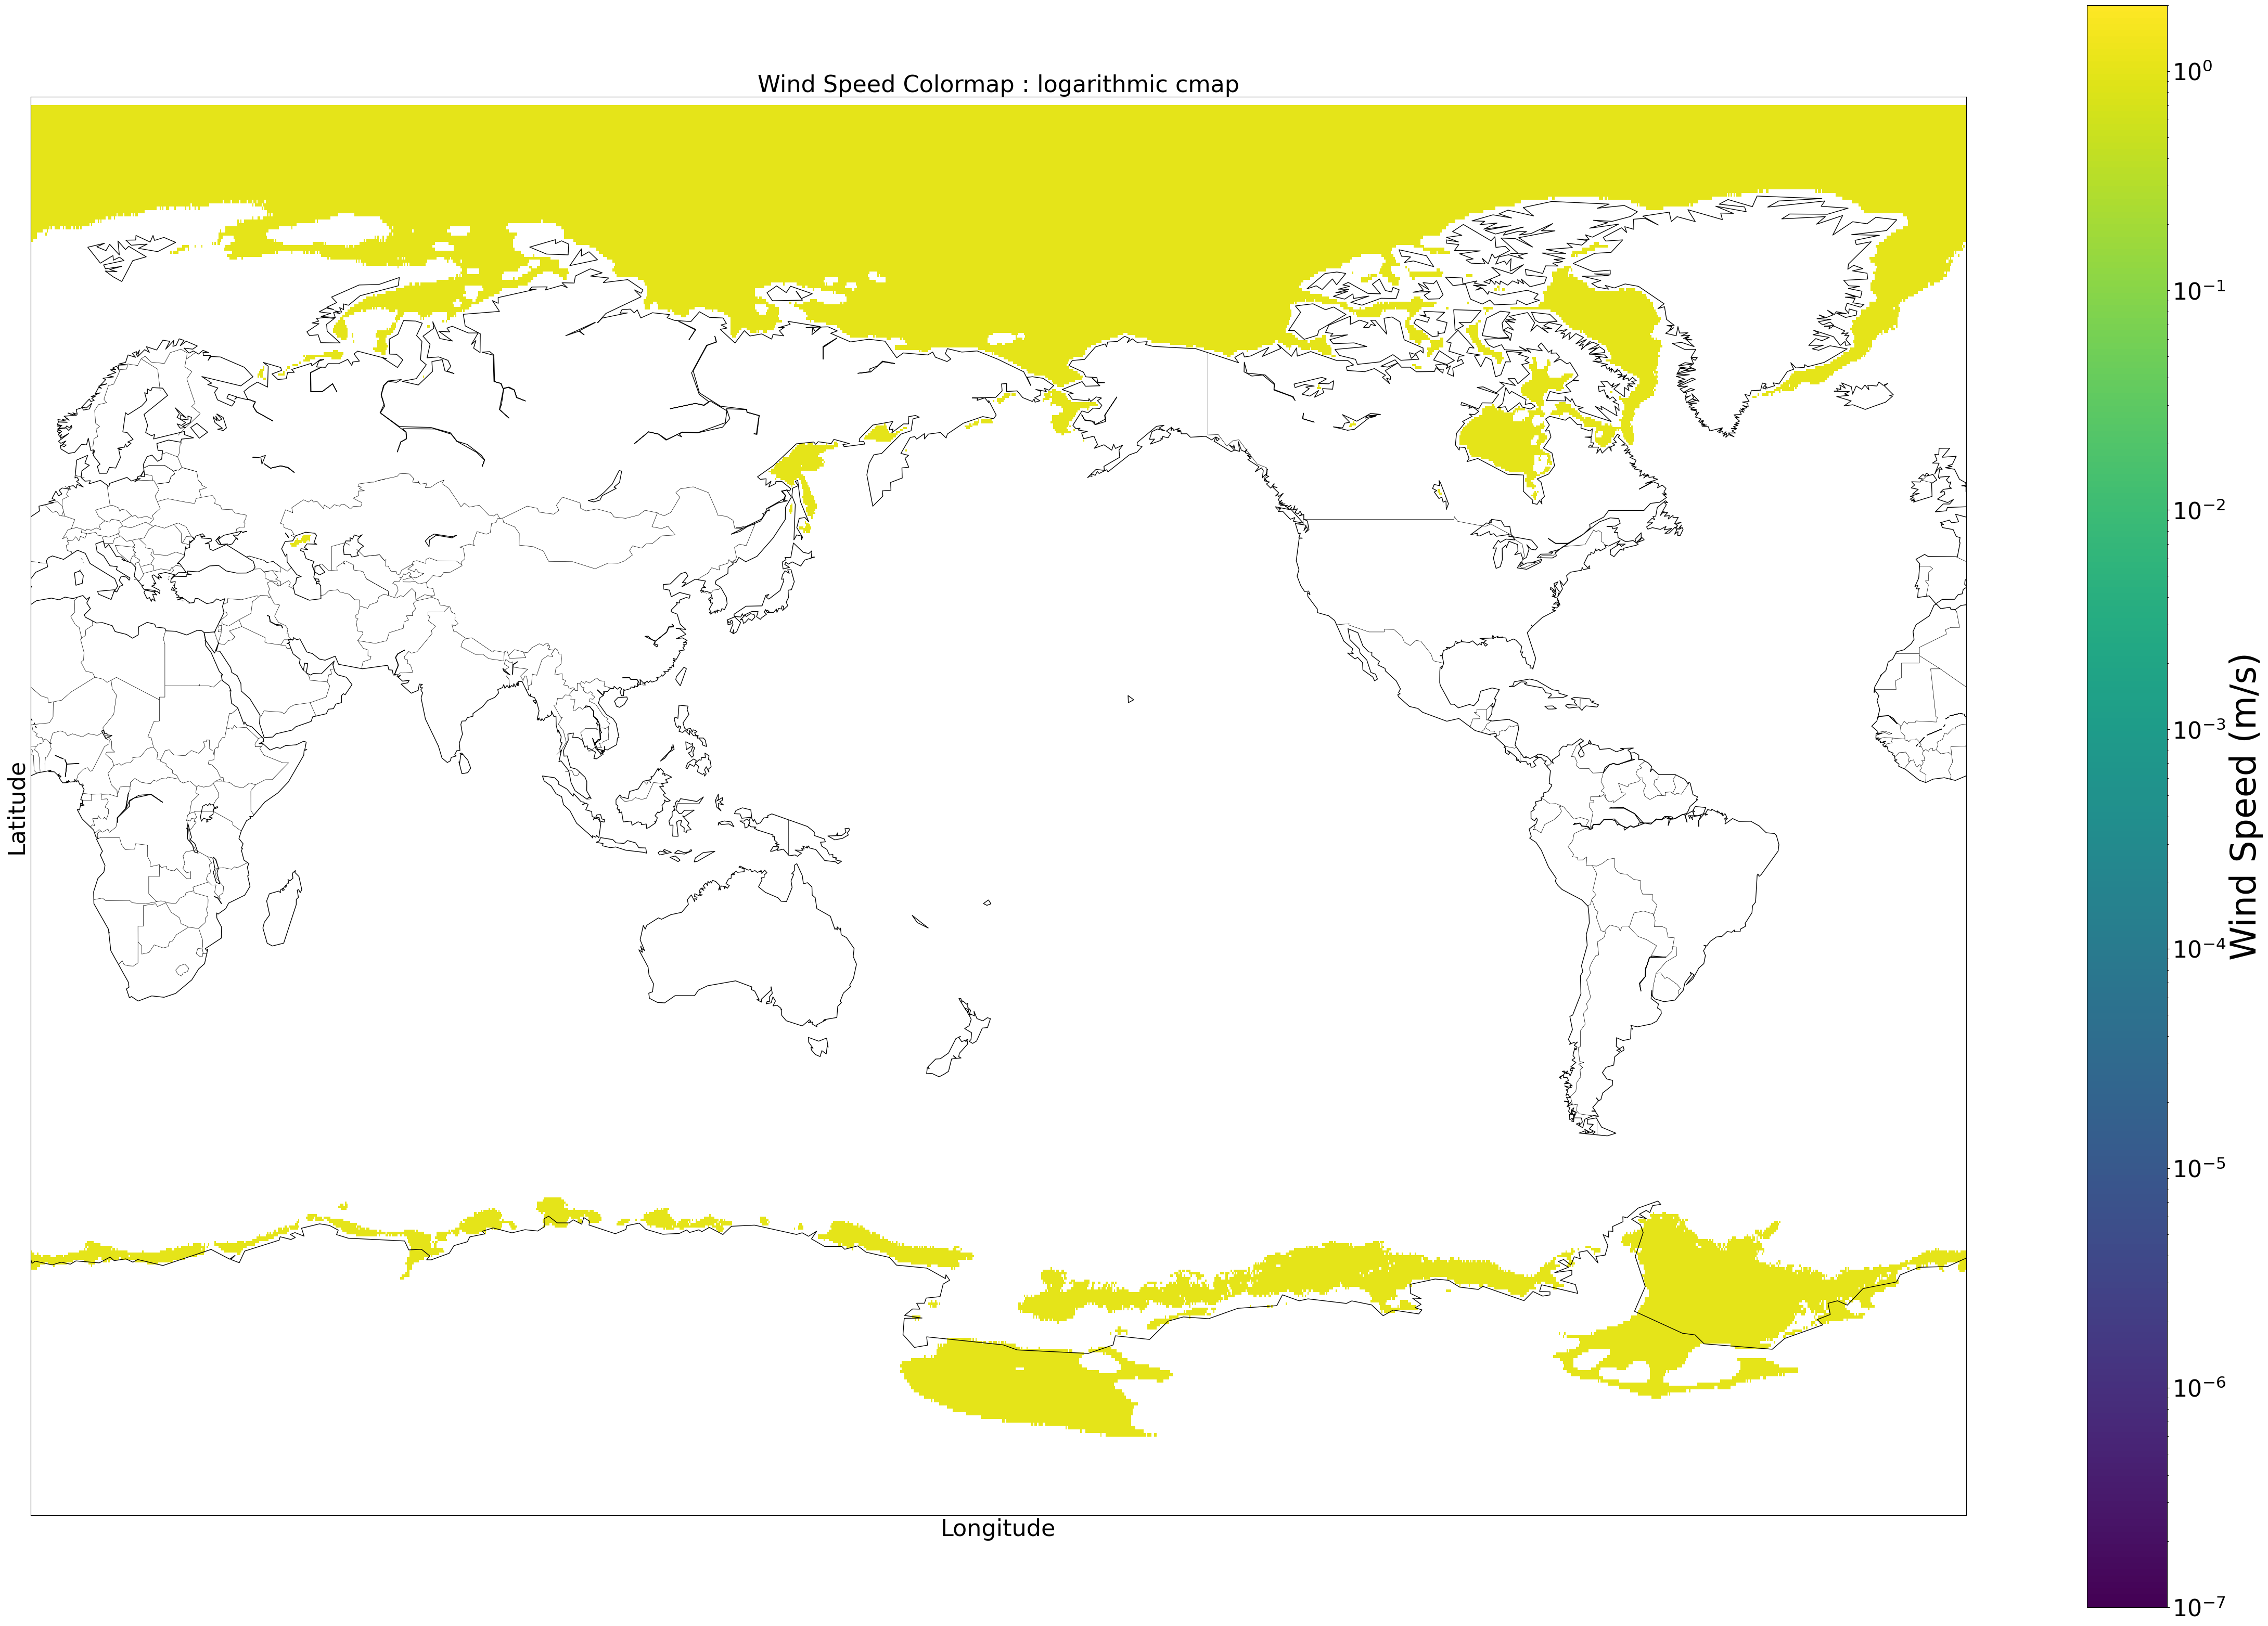

In [51]:
# Create a Basemap instance for the world map
m = Basemap(projection='mill', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)

# Create a figure and axis
fig = plt.figure(figsize=(12*5, 8*5))
ax = fig.add_subplot(1, 1, 1)

# Draw the coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Convert longitude and latitude to map coordinates
x, y = np.meshgrid(lon, lat)
x, y = m(x, y)

# Create the color plot (heatmap) with logarithmic colormap
cax = ax.pcolormesh(x, y, data, cmap='viridis', norm=LogNorm(vmin=0.0000001, vmax=2), shading='auto')

# Add a colorbar
cbar = fig.colorbar(cax)
cbar.set_label('Wind Speed (m/s)', fontsize=48)
cbar.ax.tick_params(labelsize=32)

# Add labels and title
ax.set_xlabel('Longitude', fontsize=32)
ax.set_ylabel('Latitude', fontsize=32)
ax.set_title('Wind Speed Colormap : logarithmic cmap', fontsize=32)

# Show the plot
plt.show()

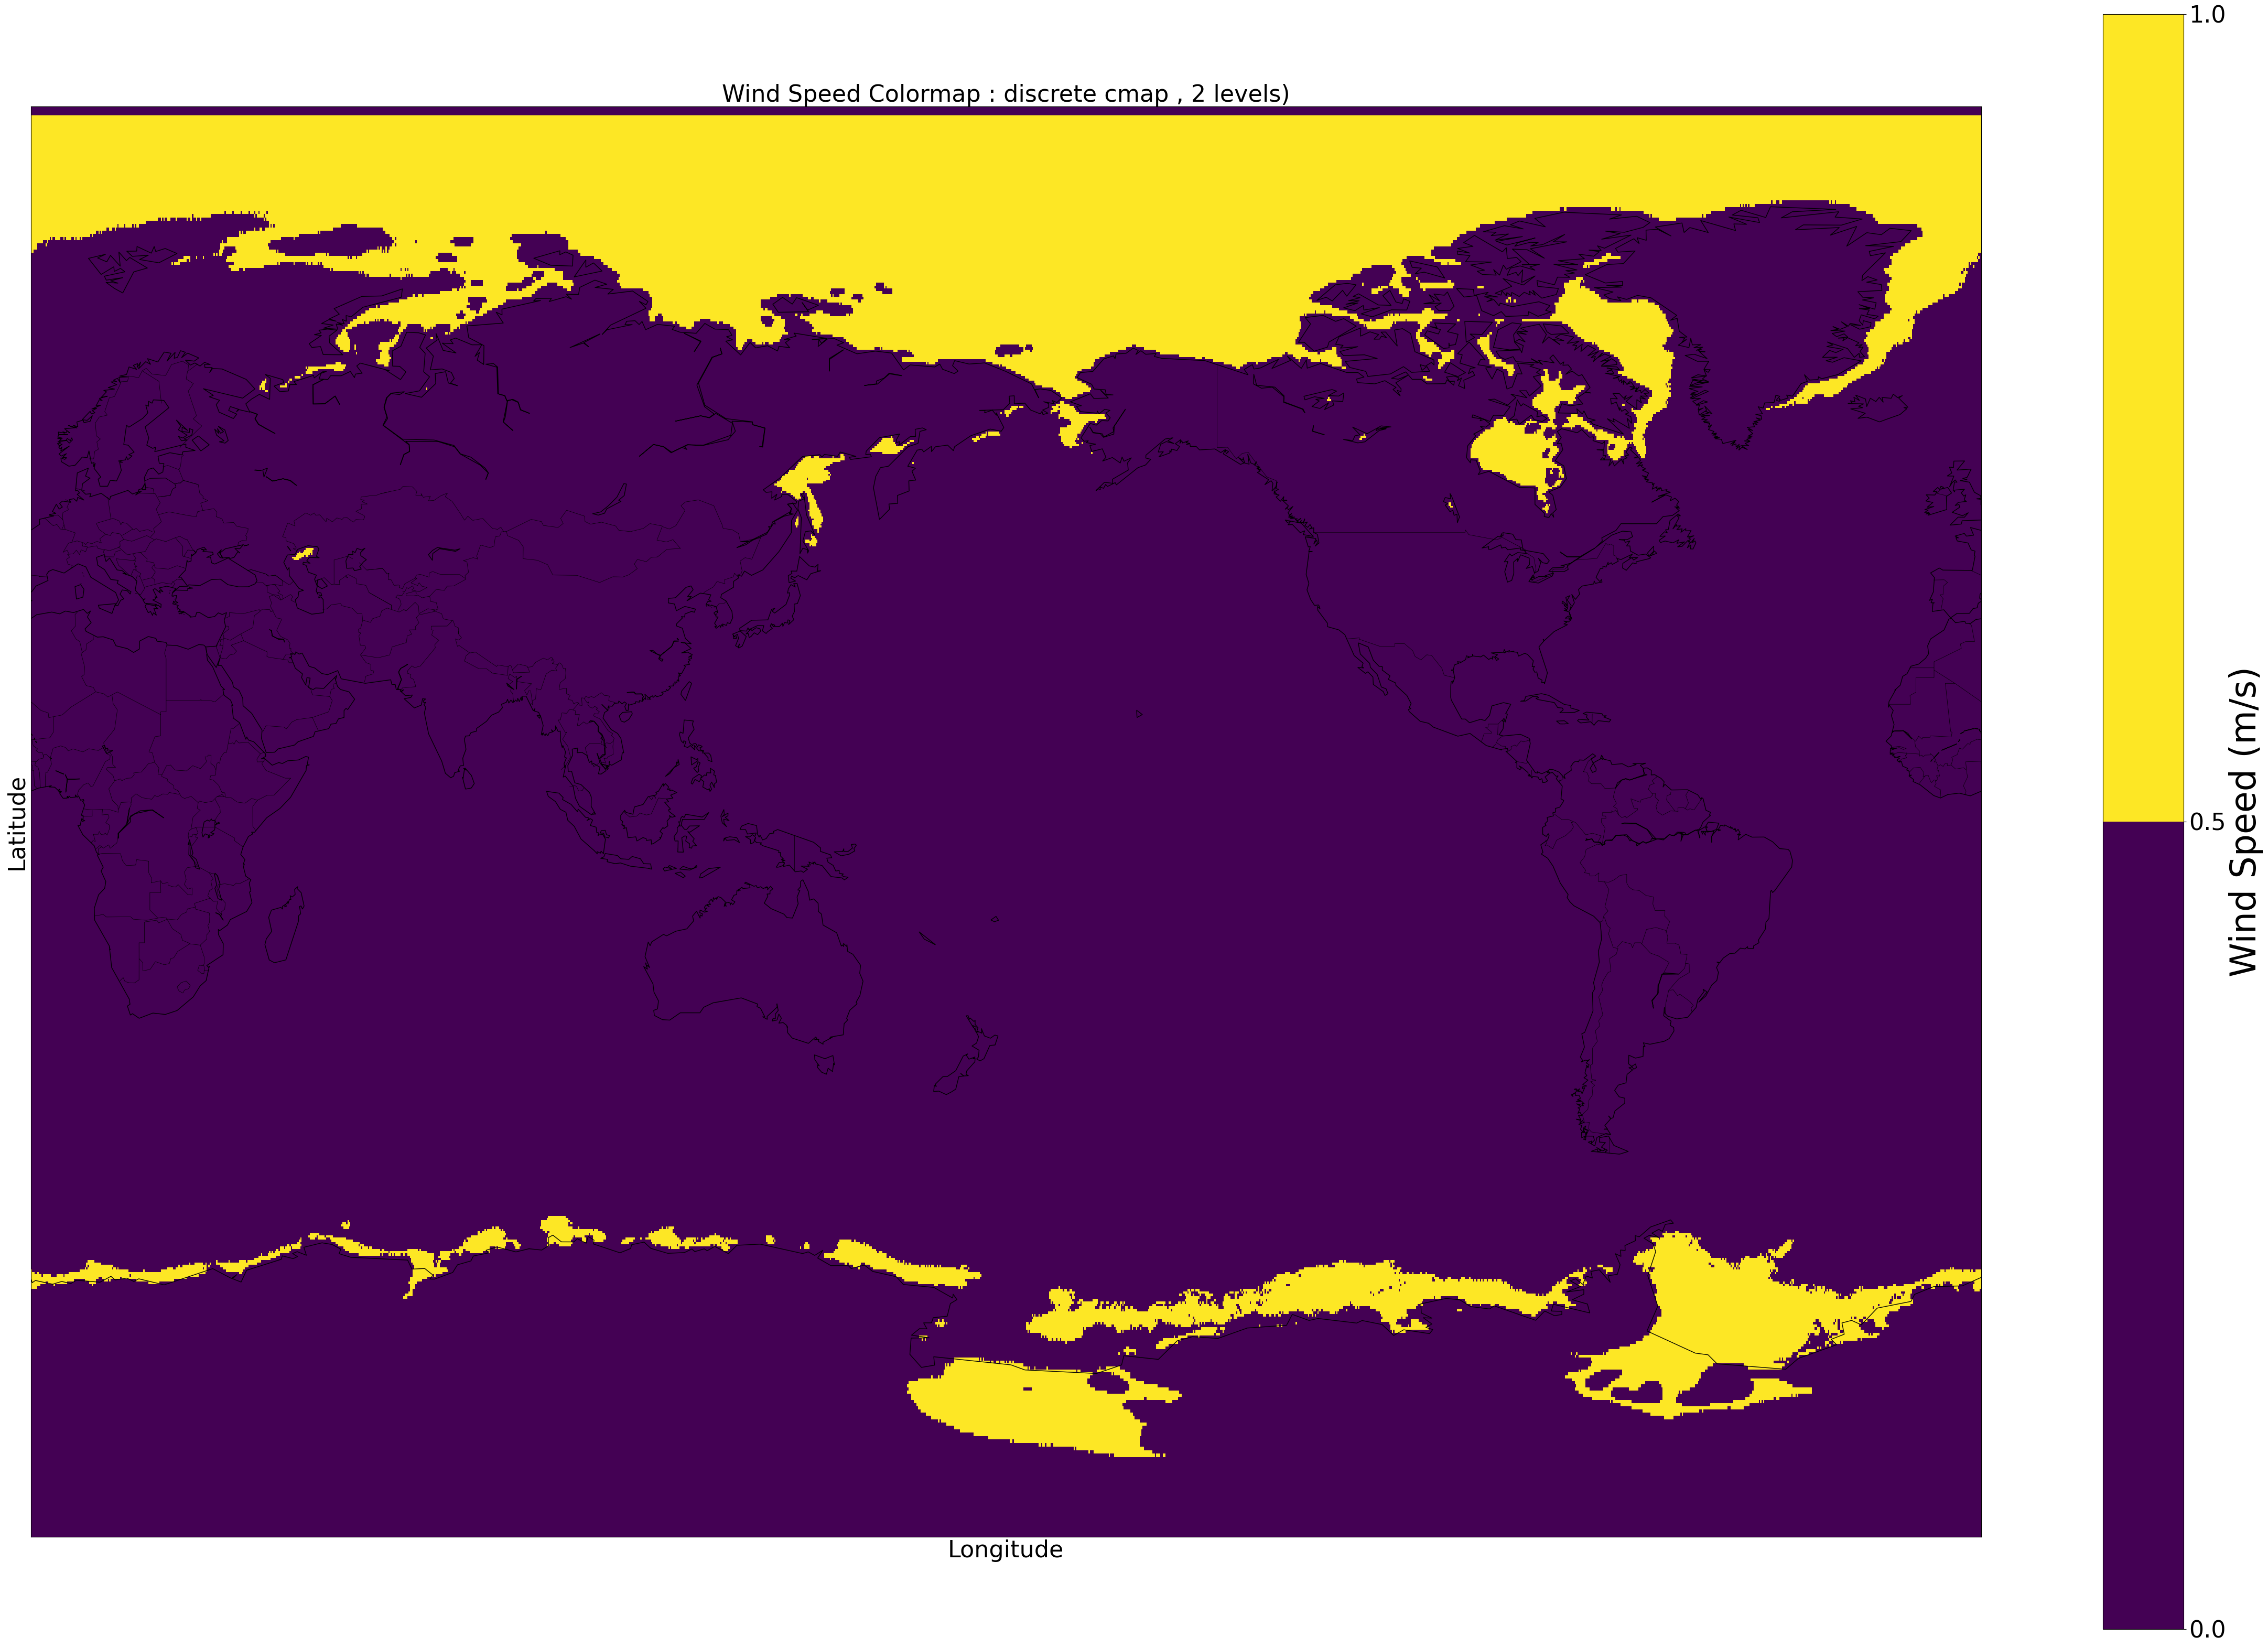

In [55]:
# Number of discrete levels in the colormap
num_levels = 2

# Define custom boundaries for discrete levels
boundaries = np.linspace(0, 1, num_levels + 1)

# Create a Basemap instance for the world map
m = Basemap(projection='mill', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)

# Create a figure and axis
fig = plt.figure(figsize=(12*5, 8*5))
ax = fig.add_subplot(1, 1, 1)

# Draw the coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Convert longitude and latitude to map coordinates
x, y = np.meshgrid(lon, lat)
x, y = m(x, y)

# Create a ListedColormap with the desired number of colors
cmap = plt.get_cmap('viridis', num_levels)

# Create the color plot (heatmap) with discrete levels in the colormap
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
cax = ax.pcolormesh(x, y, data, cmap=cmap, shading='auto', norm=norm)

# Add a colorbar
cbar = fig.colorbar(cax)
cbar.set_label('Wind Speed (m/s)', fontsize=48)
cbar.ax.tick_params(labelsize=32)


# Add labels and title
ax.set_xlabel('Longitude', fontsize=32)
ax.set_ylabel('Latitude', fontsize=32)
ax.set_title(f'Wind Speed Colormap : discrete cmap , {num_levels} levels)', fontsize=32)

# Show the plot
plt.show()